# Understanding Consumer Behaviour towards Online Shopping

This small study has been performed to understand how Nepalese consumer thinks of online shopping. I used linear regression to find out the relationships between "Attitude towards online shopping" and four other independent variables: security, web design, ..........

In [2]:
#Importing Dataset
library("dplyr", warn.conflicts=FALSE)
library("tidyverse")
stat_project <- read.csv("d:/my_tests/new_project/stat_data_file.csv")
head(stat_project)

,Age,Gender,Educational.Attainment,Income,SEC_1,SEC_2,SEC_3,SEC_4,WEB_1,WEB_2,...,REP_5,PRC_1,PRC_2,PRC_3,PRC_4,PRC_5,ATT_1,ATT_2,ATT_3,ATT_4
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,18-34,Female,Bachelor's level,Below Rs.10000,2,3,4,5,4,3,...,4,3,3,4,2,4,4,3,3,2
2,18-34,Male,Bachelor's level,Rs.30001-Rs.40000,2,2,4,5,4,4,...,4,3,4,3,4,5,4,4,3,3
3,18-34,Male,Bachelor's level,Rs.20001- Rs.30000,4,3,3,5,4,4,...,5,3,5,5,5,3,4,4,3,3
4,18-34,Male,Bachelor's level,Rs.10001-Rs.20000,3,5,5,4,4,5,...,4,2,2,3,2,5,4,4,3,4
5,18-34,Male,Higher Secondary,Below Rs.10000,3,2,4,5,4,4,...,3,4,4,4,3,4,4,3,3,3
6,18-34,Female,Bachelor's level,Rs.10001-Rs.20000,5,4,5,5,5,5,...,3,3,3,4,3,5,4,4,2,2


In [2]:
#Data manipulation
#Create average columns for security, web design, reputation and price & deals variables
stat_project_new <- stat_project %>%
  mutate(sec_avg = as.integer((SEC_1 + SEC_2 + SEC_3 + SEC_4) / 4),
         web_avg = as.integer((WEB_1 + WEB_2 + WEB_3 + WEB_4) / 4),
         rep_avg = as.integer((REP_1 + REP_2 + REP_3 + REP_4 + REP_5) / 5),
         prc_avg = as.integer((PRC_1 + PRC_2 + PRC_3 + PRC_4 + PRC_5) / 5),
         att_avg = as.integer((ATT_1 + ATT_2 + ATT_3 + ATT_4) / 4))
head(stat_project_new)

,Age,Gender,Educational.Attainment,Income,SEC_1,SEC_2,SEC_3,SEC_4,WEB_1,WEB_2,...,PRC_5,ATT_1,ATT_2,ATT_3,ATT_4,sec_avg,web_avg,rep_avg,prc_avg,att_avg
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,18-34,Female,Bachelor's level,Below Rs.10000,2,3,4,5,4,3,...,4,4,3,3,2,3,3,4,3,3
2,18-34,Male,Bachelor's level,Rs.30001-Rs.40000,2,2,4,5,4,4,...,5,4,4,3,3,3,4,3,3,3
3,18-34,Male,Bachelor's level,Rs.20001- Rs.30000,4,3,3,5,4,4,...,3,4,4,3,3,3,4,4,4,3
4,18-34,Male,Bachelor's level,Rs.10001-Rs.20000,3,5,5,4,4,5,...,5,4,4,3,4,4,4,3,2,3
5,18-34,Male,Higher Secondary,Below Rs.10000,3,2,4,5,4,4,...,4,4,3,3,3,3,4,3,3,3
6,18-34,Female,Bachelor's level,Rs.10001-Rs.20000,5,4,5,5,5,5,...,5,4,4,2,2,4,4,3,3,3


Demographic data of Respondents

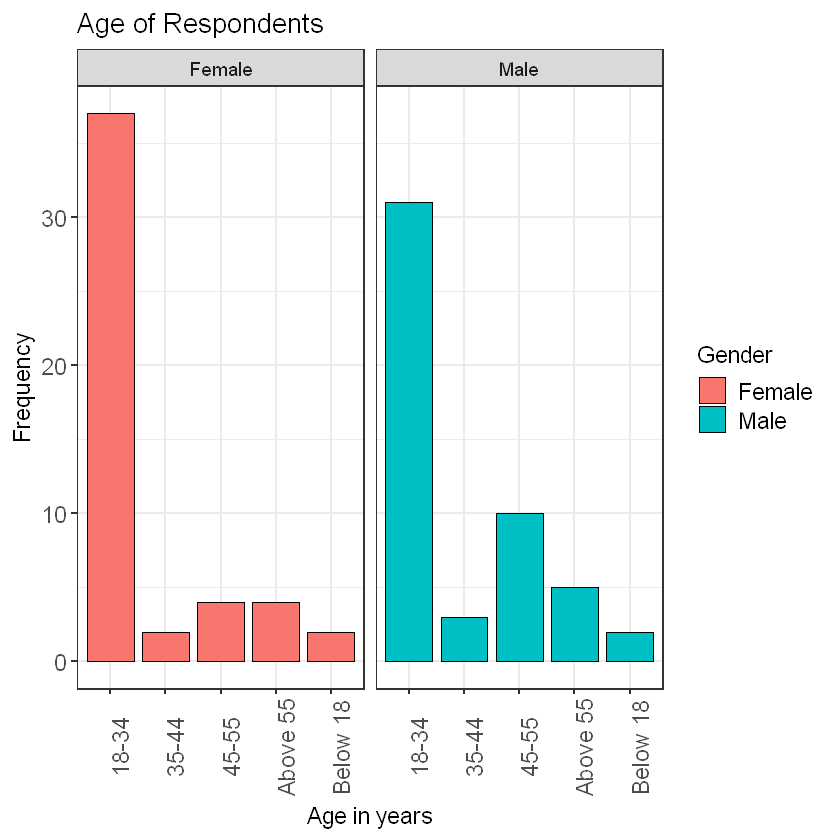

In [4]:
#Plotting demographic Gender and Age
ggplot(stat_project, aes(x=Age, fill=Gender)) +
geom_bar(position="dodge", width=0.85, colour="black") +
labs(title="Age of Respondents",
    x="Age in years",
    y="Frequency") +
theme_bw(base_size=14) +
  theme(axis.text = element_text(size = 14),
        axis.text.x = element_text(angle=90),
       legend.text = element_text(size = 14),
       plot.title = element_text(size=16)) +
facet_wrap(~Gender)

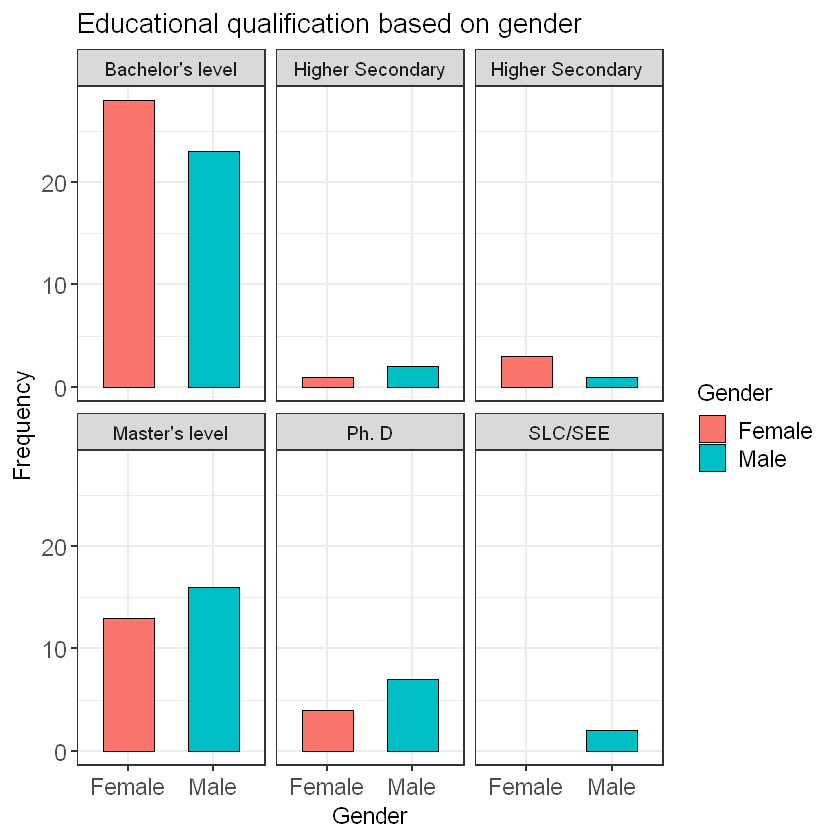

In [5]:
#Pie chart of gender and educational qualilification of Respondents
library("ggplot2")
ggplot(stat_project_new, aes(x=Gender, fill=Gender)) +
geom_bar(width=0.6, colour="black") +
labs(title="Educational qualification based on gender",
    x="Gender",
    y="Frequency") +
theme_bw(base_size=14) +
theme(axis.text = element_text(size=14),
     legend.text=element_text(size=14),
     plot.title=element_text(size=16)) +
facet_wrap(~stat_project_new$Educational.Attainment)

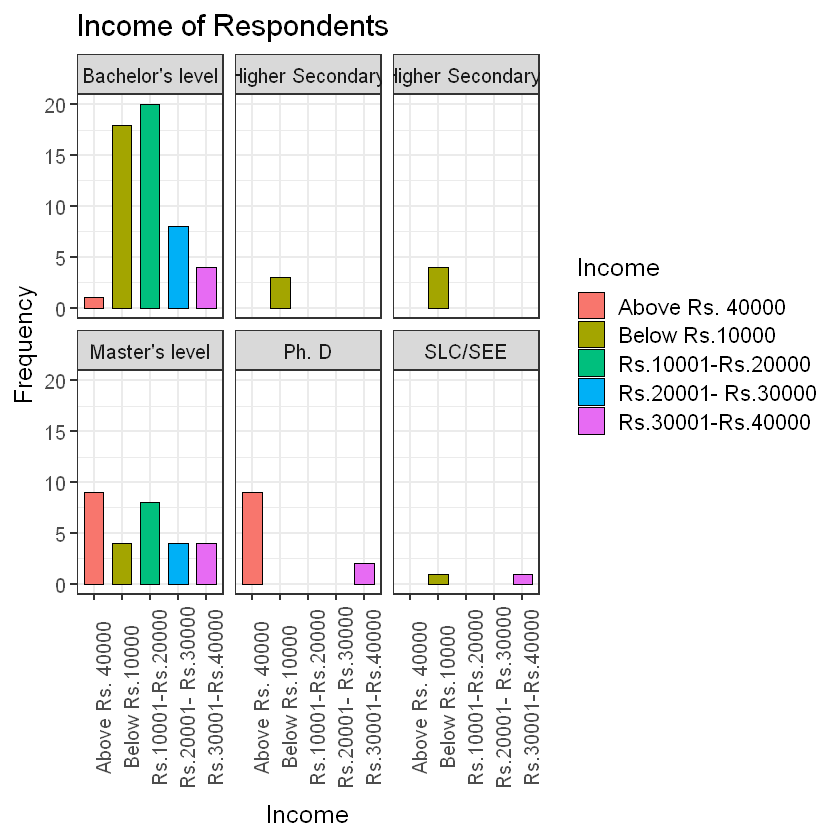

In [6]:
# #Plotting Income distribution of the respondents
# levels(stat_project$Income) <- c("Below Rs.10000", "Rs.10001-Rs.20000", "Rs.20001-Rs.Rs.30000", "Rs.30001-Rs.40000", "Above Rs. 40000")
# levels(stat_project$Educational.Attainment) <- c("SLC/SEE", "Higher Secondary", "Bachelor's level", "Master's level", "Ph. D")
# levels(stat_project$Gender) <- c("Male", "Female")
# sapply(stat_project, levels)
ggplot(stat_project, aes(Income, fill=Income)) +
geom_bar(width=0.7, colour="black") +
#coord_flip() +
facet_wrap(~stat_project$Educational.Attainment) +
labs(title="Income of Respondents",
    x="Income",
    y="Frequency") +
theme_bw(base_size=15) +
theme(axis.text = element_text(size = 12),
     axis.text.x = element_text(angle = 90),
     plot.title = element_text(size=18),
     legend.text = element_text(size=13))

Plotting Likert Scales
1 - Strongly Disagree
2 - Disagree
3 - Neither agree nor disagree
4 - Agree
5 - Strongly Agree

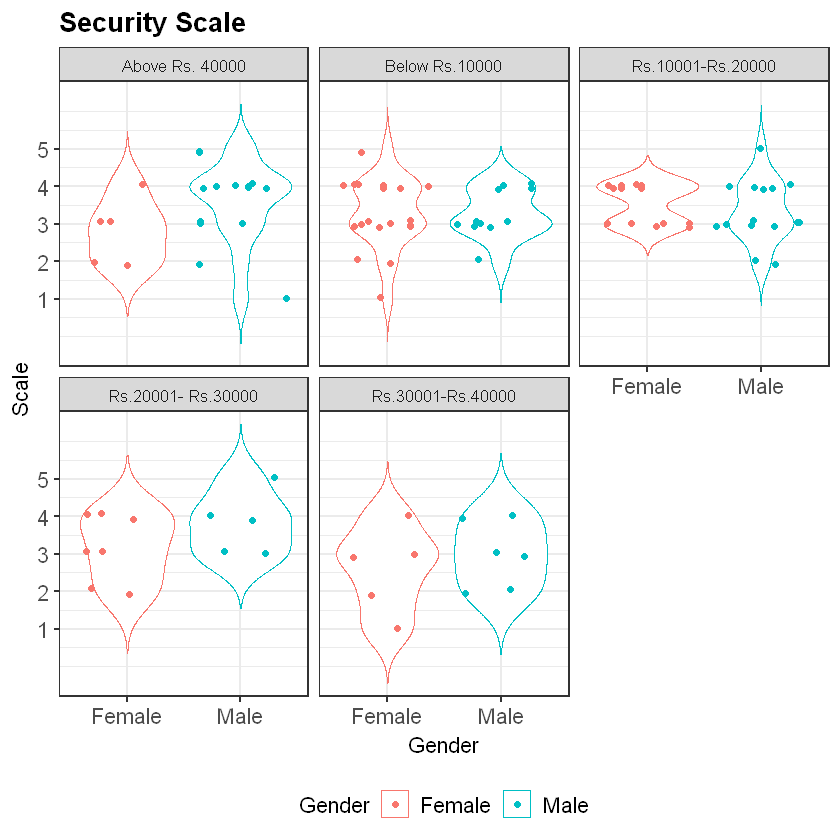

In [7]:
#Plotting security variable
ggplot(stat_project_new, aes(Gender, sec_avg, color=Gender)) +
geom_violin(trim=FALSE) +
geom_jitter(height=0.1) +
#geom_boxplot(width=0.1) +
facet_wrap(~Income) +
scale_y_continuous(name="Scale", breaks=c(1,2,3,4,5)) +
labs(title="Security Scale", x="Gender", y="") +
theme_bw(base_size=13) +
theme(axis.text=element_text(size=13),
     legend.text=element_text(size=13),
     legend.position="bottom",
     plot.title=element_text(size=16, face="bold"))

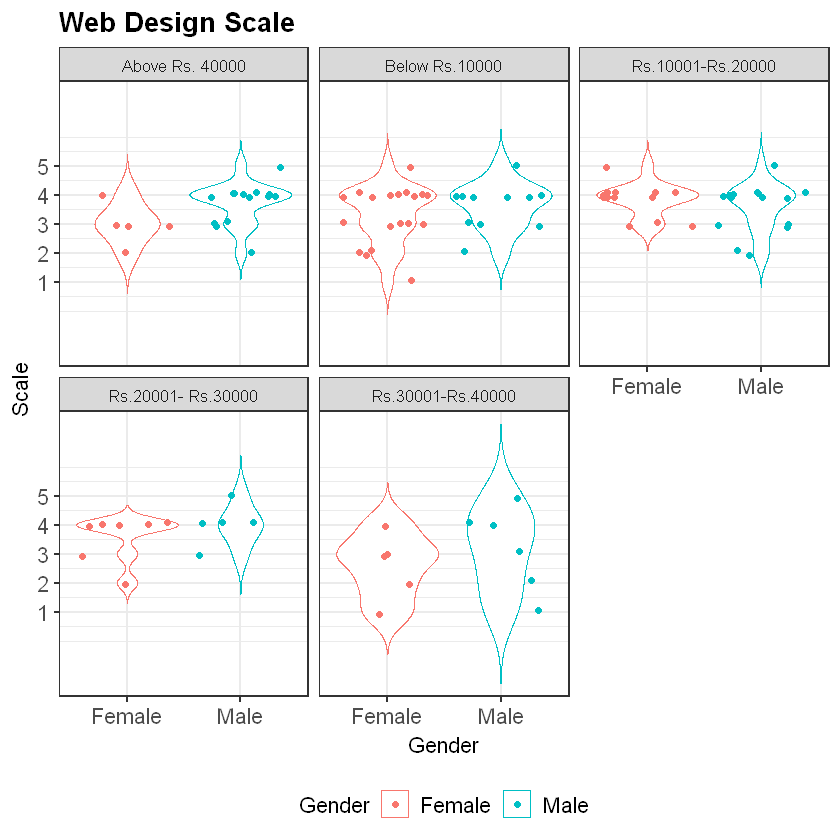

In [14]:
#Plotting Web design variable
ggplot(stat_project_new, aes(Gender, web_avg, color=Gender)) +
geom_violin(trim=FALSE) +
geom_jitter(height=0.1) +
#geom_boxplot(width=0.1) +
facet_wrap(~Income) +
scale_y_continuous(name="Scale", breaks=c(1,2,3,4,5)) +
labs(title="Web Design Scale", x="Gender", y="") +
theme_bw(base_size=13) +
theme(axis.text=element_text(size=13),
     legend.text=element_text(size=13),
     legend.position="bottom",
     plot.title=element_text(size=16, face="bold"))

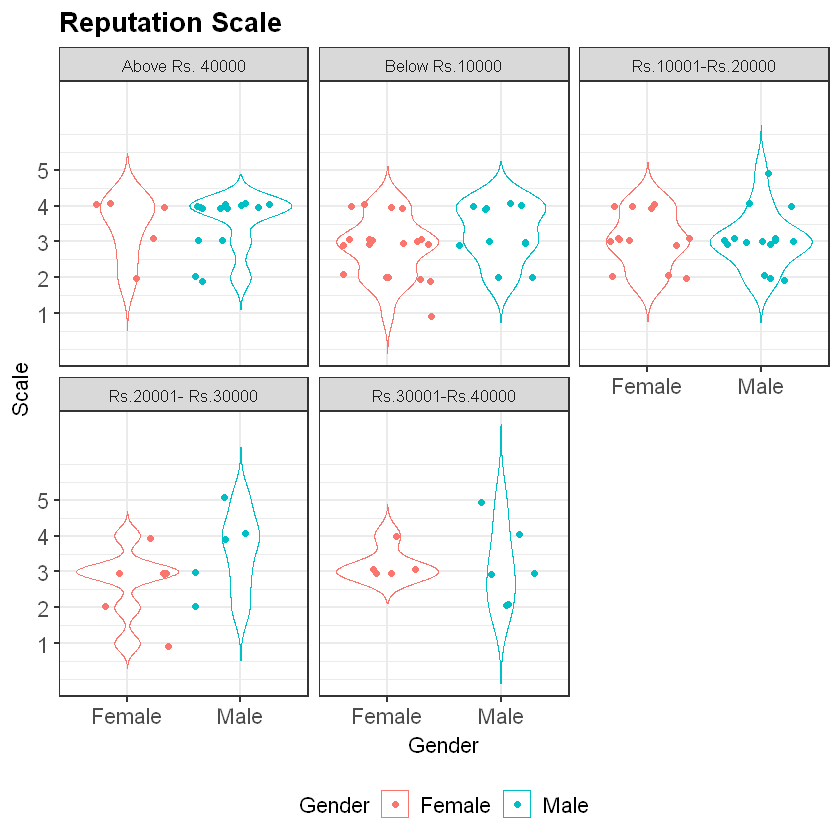

In [9]:
#Plotting Reputation scale
ggplot(stat_project_new, aes(Gender, rep_avg, color=Gender)) +
geom_violin(trim=FALSE) +
geom_jitter(height=0.1) +
#geom_boxplot(width=0.1) +
facet_wrap(~Income) +
scale_y_continuous(name="Scale", breaks=c(1,2,3,4,5)) +
labs(title="Reputation Scale", x="Gender", y="") +
theme_bw(base_size=13) +
theme(axis.text=element_text(size=13),
     legend.text=element_text(size=13),
     legend.position="bottom",
     plot.title=element_text(size=16, face="bold"))

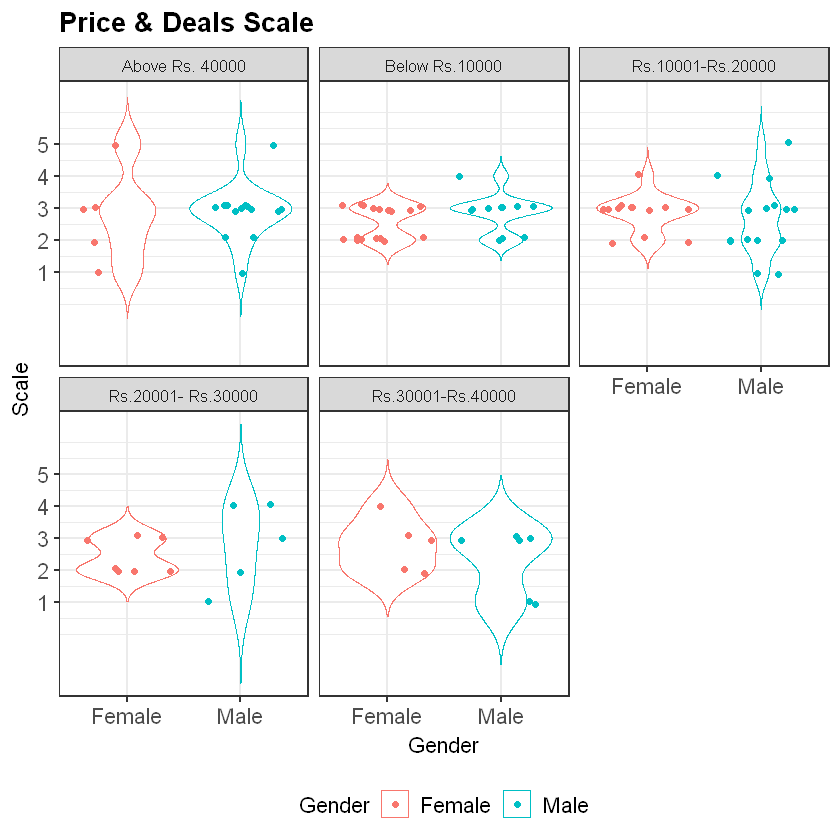

In [10]:
#Plotting price and deals scale
ggplot(stat_project_new, aes(Gender, prc_avg, color=Gender)) +
geom_violin(trim=FALSE) +
geom_jitter(height=0.1) +
#geom_boxplot(width=0.1) +
facet_wrap(~Income) +
scale_y_continuous(name="Scale", breaks=c(1,2,3,4,5)) +
labs(title="Price & Deals Scale", x="Gender", y="") +
theme_bw(base_size=13) +
theme(axis.text=element_text(size=13),
     legend.text=element_text(size=13),
     legend.position="bottom",
     plot.title=element_text(size=16, face="bold"))

In [11]:
#Regression Analysis
model <- lm(att_avg ~ sec_avg + web_avg + rep_avg + prc_avg, data = stat_project_new)
print(model)


Call:
lm(formula = att_avg ~ sec_avg + web_avg + rep_avg + prc_avg, 
    data = stat_project_new)

Coefficients:
(Intercept)      sec_avg      web_avg      rep_avg      prc_avg  
    1.56250      0.11925      0.19183      0.07264      0.03031  



In [12]:
anova <- aov(att_avg ~ sec_avg + web_avg + rep_avg + prc_avg, data = stat_project_new)
summary(anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
sec_avg      1  6.337   6.337  47.916 5.20e-10 ***
web_avg      1  2.383   2.383  18.021 5.09e-05 ***
rep_avg      1  0.308   0.308   2.330    0.130    
prc_avg      1  0.049   0.049   0.371    0.544    
Residuals   95 12.563   0.132                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [101]:
# #Plotting Likert Scale
# #Creating fake data
# Gender <- c(94,95,96,97,98)
# sec_avg <- c(1,2,3,4,5)
# web_avg <- c(1,2,3,4,5)
# rep_avg <- c(1,2,3,4,5)
# prc_avg <- c(1,2,3,4,5)
# att_avg <- c(1,2,3,4,5)
# fake <- data.frame(Gender, sec_avg, web_avg, rep_avg, prc_avg, att_avg)
# #Append the fake dataframe to the real dataframe, and convert all of the variables to factor format
# select_data2 <- rbind(select_data, fake)
# select_data2$sec_avg_f <- as.factor(select_data2$sec_avg)
# select_data2$web_avg_f <- as.factor(select_data2$web_avg)
# select_data2$rep_avg_f <- as.factor(select_data2$rep_avg)
# select_data2$prc_avg_f <- as.factor(select_data2$prc_avg)
# select_data2$att_avg_f <- as.factor(select_data2$att_avg)
# #Attach factor levels to each of the Likert statement variables you just converted to a factor
# factor_levels <- c("Strongly Disagree", "Disagree", "Neither agree nor disagree", "Agree", "Strongly Disagree")
# levels(select_data2$sec_avg_f) <- factor_levels
# levels(select_data2$web_avg_f) <- factor_levels
# levels(select_data2$rep_avg_f) <- factor_levels
# levels(select_data2$prc_avg_f) <- factor_levels
# levels(select_data2$att_avg_f) <- factor_levels
# head(select_data2)
# #Removing fake data
# nrow(select_data2)
# select_data3 <- subset(select_data2, Gender<94)
# nrow(select_data3)
# #Remove the study ID column, and all the original numeric columns without the _f suffix
# colnames(select_data3)
# select_data4 <- select_data3[, 7:11]
# colnames(select_data4)
# glimpse(select_data4)
# #Replace the Likert plot data column headings with the actual Likert statement
# var_headings <- c("Security", "Web Design", "Reputation", "Price and Deals", "Attitude")
# names(select_data4) <- var_headings
# colnames(select_data4)
# #Plotting likert scales
# library("likert")
# p <- likert(select_data4) 
# a <- likert.bar.plot(p, legend.position = "right", text.size = 4) +
# theme(text = element_text(size = rel(4)),axis.text.y = element_text(size = rel(2))) +
# theme_update(legend.text = element_text(size = rel(0.7))) +
# theme_classic()
# plot(a)